In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("/kaggle/input/redbus-data-decode-hackathon-2025/train_JDXlpm8/train/train.csv")

In [3]:
df

,doj,srcid,destid,final_seatcount
0,2023-03-01,45,46,2838.0
1,2023-03-01,46,45,2298.0
2,2023-03-01,45,47,2720.0
3,2023-03-01,47,45,2580.0
4,2023-03-01,46,9,4185.0
...,...,...,...,...
67195,2024-12-31,2,24,800.0
67196,2024-12-31,44,45,1360.0
67197,2024-12-31,47,10,560.0
67198,2024-12-31,38,36,535.0


In [4]:
df.isna().sum()

doj                0
srcid              0
destid             0
final_seatcount    0
dtype: int64

In [5]:
df['srcid'].unique()

array([45, 46, 47,  9, 48,  5, 35, 44,  2, 11, 19, 36, 28, 40, 30, 32, 12,
       13, 43,  7, 18, 23, 42,  3, 34, 25, 16, 26, 31, 15, 20, 27, 14, 39,
        8, 41, 37, 22,  6, 33, 21,  1, 17,  4, 38])

In [6]:
df['doj'] = pd.to_datetime(df['doj'],errors='coerce')
df.corr()['final_seatcount']

doj                0.160178
srcid              0.125972
destid             0.129146
final_seatcount    1.000000
Name: final_seatcount, dtype: float64

In [7]:
df_test=pd.read_csv("/kaggle/input/redbus-data-decode-hackathon-2025/test_8gqdJqH.csv")

In [8]:
df_test

,route_key,doj,srcid,destid
0,2025-02-11_46_45,2025-02-11,46,45
1,2025-01-20_17_23,2025-01-20,17,23
2,2025-01-08_02_14,2025-01-08,2,14
3,2025-01-08_08_47,2025-01-08,8,47
4,2025-01-08_09_46,2025-01-08,9,46
...,...,...,...,...
5895,2025-01-23_46_48,2025-01-23,46,48
5896,2025-02-21_46_09,2025-02-21,46,9
5897,2025-01-17_32_19,2025-01-17,32,19
5898,2025-01-24_45_03,2025-01-24,45,3


In [9]:
df1=pd.read_csv("/kaggle/input/redbus-data-decode-hackathon-2025/train_JDXlpm8/train/transactions.csv")

In [10]:
df1['doj'] = pd.to_datetime(df1['doj'],errors='coerce',dayfirst=False)
df1['doi'] = pd.to_datetime(df1['doi'],errors='coerce',dayfirst=False)

In [11]:
df1['doj'] = df1['doj'].dt.date
df1['doi'] = df1['doi'].dt.date

In [ ]:
df1.isna().sum()

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2266100 entries, 0 to 2266099
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   doj                 object 
 1   doi                 object 
 2   srcid               int64  
 3   destid              int64  
 4   srcid_region        object 
 5   destid_region       object 
 6   srcid_tier          object 
 7   destid_tier         object 
 8   cumsum_seatcount    float64
 9   cumsum_searchcount  float64
 10  dbd                 int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 190.2+ MB


In [13]:
df1

,doj,doi,srcid,destid,srcid_region,destid_region,srcid_tier,destid_tier,cumsum_seatcount,cumsum_searchcount,dbd
0,2023-03-01,2023-01-30,45,46,Karnataka,Tamil Nadu,Tier 1,Tier 1,8.0,76.0,30
1,2023-03-01,2023-01-30,46,45,Tamil Nadu,Karnataka,Tier 1,Tier 1,8.0,70.0,30
2,2023-03-01,2023-01-30,45,47,Karnataka,Andhra Pradesh,Tier 1,Tier 1,4.0,142.0,30
3,2023-03-01,2023-01-30,47,45,Andhra Pradesh,Karnataka,Tier 1,Tier 1,0.0,68.0,30
4,2023-03-01,2023-01-30,46,9,Tamil Nadu,Tamil Nadu,Tier 1,Tier2,9.0,162.0,30
...,...,...,...,...,...,...,...,...,...,...,...
2266095,2025-02-28,2025-02-28,2,24,Maharashtra and Goa,Maharashtra and Goa,Tier 1,Tier2,0.0,0.0,0
2266096,2025-02-28,2025-02-28,44,45,Tamil Nadu,Karnataka,Tier2,Tier 1,0.0,0.0,0
2266097,2025-02-28,2025-02-28,47,10,Andhra Pradesh,Andhra Pradesh,Tier 1,Tier 3,0.0,0.0,0
2266098,2025-02-28,2025-02-28,38,36,Rest of North,Delhi,Tier 1,Tier2,0.0,0.0,0


In [14]:
from datetime import date
train=df1[df1['doj'] <= date(2024,12,31)]

In [15]:
train

,doj,doi,srcid,destid,srcid_region,destid_region,srcid_tier,destid_tier,cumsum_seatcount,cumsum_searchcount,dbd
0,2023-03-01,2023-01-30,45,46,Karnataka,Tamil Nadu,Tier 1,Tier 1,8.0,76.0,30
1,2023-03-01,2023-01-30,46,45,Tamil Nadu,Karnataka,Tier 1,Tier 1,8.0,70.0,30
2,2023-03-01,2023-01-30,45,47,Karnataka,Andhra Pradesh,Tier 1,Tier 1,4.0,142.0,30
3,2023-03-01,2023-01-30,47,45,Andhra Pradesh,Karnataka,Tier 1,Tier 1,0.0,68.0,30
4,2023-03-01,2023-01-30,46,9,Tamil Nadu,Tamil Nadu,Tier 1,Tier2,9.0,162.0,30
...,...,...,...,...,...,...,...,...,...,...,...
2083195,2024-12-31,2024-12-31,2,24,Maharashtra and Goa,Maharashtra and Goa,Tier 1,Tier2,800.0,34460.0,0
2083196,2024-12-31,2024-12-31,44,45,Tamil Nadu,Karnataka,Tier2,Tier 1,1360.0,25295.0,0
2083197,2024-12-31,2024-12-31,47,10,Andhra Pradesh,Andhra Pradesh,Tier 1,Tier 3,560.0,26570.0,0
2083198,2024-12-31,2024-12-31,38,36,Rest of North,Delhi,Tier 1,Tier2,535.0,18065.0,0


In [16]:
train['final_seat_count'] = train.groupby(['srcid','destid','doj'])['cumsum_seatcount'].transform('max')

/tmp/ipykernel_3856/543152450.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['final_seat_count'] = train.groupby(['srcid','destid','doj'])['cumsum_seatcount'].transform('max')


In [17]:
train

,doj,doi,srcid,destid,srcid_region,destid_region,srcid_tier,destid_tier,cumsum_seatcount,cumsum_searchcount,dbd,final_seat_count
0,2023-03-01,2023-01-30,45,46,Karnataka,Tamil Nadu,Tier 1,Tier 1,8.0,76.0,30,2838.0
1,2023-03-01,2023-01-30,46,45,Tamil Nadu,Karnataka,Tier 1,Tier 1,8.0,70.0,30,2298.0
2,2023-03-01,2023-01-30,45,47,Karnataka,Andhra Pradesh,Tier 1,Tier 1,4.0,142.0,30,2720.0
3,2023-03-01,2023-01-30,47,45,Andhra Pradesh,Karnataka,Tier 1,Tier 1,0.0,68.0,30,2580.0
4,2023-03-01,2023-01-30,46,9,Tamil Nadu,Tamil Nadu,Tier 1,Tier2,9.0,162.0,30,4185.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2083195,2024-12-31,2024-12-31,2,24,Maharashtra and Goa,Maharashtra and Goa,Tier 1,Tier2,800.0,34460.0,0,800.0
2083196,2024-12-31,2024-12-31,44,45,Tamil Nadu,Karnataka,Tier2,Tier 1,1360.0,25295.0,0,1360.0
2083197,2024-12-31,2024-12-31,47,10,Andhra Pradesh,Andhra Pradesh,Tier 1,Tier 3,560.0,26570.0,0,560.0
2083198,2024-12-31,2024-12-31,38,36,Rest of North,Delhi,Tier 1,Tier2,535.0,18065.0,0,535.0


In [18]:
tier_map = {
    'Tier 1': 4,
    'Tier2': 3,
    'Tier 3': 2,
    'Tier 4': 1
}

train['srcid_tier'] = train['srcid_tier'].map(tier_map)
train['destid_tier'] = train['destid_tier'].map(tier_map)


/tmp/ipykernel_3856/1815325401.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['srcid_tier'] = train['srcid_tier'].map(tier_map)
/tmp/ipykernel_3856/1815325401.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['destid_tier'] = train['destid_tier'].map(tier_map)


In [19]:
import datetime
train[(train['doj'] == datetime.date(2023, 3, 1)) & (train['srcid']==2)&(train.destid==14)]


,doj,doi,srcid,destid,srcid_region,destid_region,srcid_tier,destid_tier,cumsum_seatcount,cumsum_searchcount,dbd,final_seat_count
91,2023-03-01,2023-01-30,2,14,Maharashtra and Goa,Maharashtra and Goa,4,3,0.0,45.0,30,1090.0
191,2023-03-01,2023-01-31,2,14,Maharashtra and Goa,Maharashtra and Goa,4,3,0.0,45.0,29,1090.0
291,2023-03-01,2023-02-01,2,14,Maharashtra and Goa,Maharashtra and Goa,4,3,0.0,50.0,28,1090.0
391,2023-03-01,2023-02-02,2,14,Maharashtra and Goa,Maharashtra and Goa,4,3,0.0,50.0,27,1090.0
491,2023-03-01,2023-02-03,2,14,Maharashtra and Goa,Maharashtra and Goa,4,3,0.0,50.0,26,1090.0
591,2023-03-01,2023-02-04,2,14,Maharashtra and Goa,Maharashtra and Goa,4,3,0.0,50.0,25,1090.0
691,2023-03-01,2023-02-05,2,14,Maharashtra and Goa,Maharashtra and Goa,4,3,0.0,60.0,24,1090.0
791,2023-03-01,2023-02-06,2,14,Maharashtra and Goa,Maharashtra and Goa,4,3,0.0,60.0,23,1090.0
891,2023-03-01,2023-02-07,2,14,Maharashtra and Goa,Maharashtra and Goa,4,3,0.0,60.0,22,1090.0
991,2023-03-01,2023-02-08,2,14,Maharashtra and Goa,Maharashtra and Goa,4,3,0.0,60.0,21,1090.0


In [20]:
train1=train[train['dbd']<=15]

In [21]:
train1['year'] = train1['doj'].apply(lambda x: x.year)
train1['month'] = train1['doj'].apply(lambda x: x.month)
train1['day'] = train1['doj'].apply(lambda x: x.day)
train1['day_of_week'] = train1['doj'].apply(lambda x: x.strftime('%A'))  # e.g., 'Monday'
train1.head()

/tmp/ipykernel_3856/2326302888.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train1['year'] = train1['doj'].apply(lambda x: x.year)
/tmp/ipykernel_3856/2326302888.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train1['month'] = train1['doj'].apply(lambda x: x.month)
/tmp/ipykernel_3856/2326302888.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

,doj,doi,srcid,destid,srcid_region,destid_region,srcid_tier,destid_tier,cumsum_seatcount,cumsum_searchcount,dbd,final_seat_count,year,month,day,day_of_week
1500,2023-03-01,2023-02-14,45,46,Karnataka,Tamil Nadu,4,4,16.0,480.0,15,2838.0,2023,3,1,Wednesday
1501,2023-03-01,2023-02-14,46,45,Tamil Nadu,Karnataka,4,4,34.0,352.0,15,2298.0,2023,3,1,Wednesday
1502,2023-03-01,2023-02-14,45,47,Karnataka,Andhra Pradesh,4,4,36.0,892.0,15,2720.0,2023,3,1,Wednesday
1503,2023-03-01,2023-02-14,47,45,Andhra Pradesh,Karnataka,4,4,18.0,1130.0,15,2580.0,2023,3,1,Wednesday
1504,2023-03-01,2023-02-14,46,9,Tamil Nadu,Tamil Nadu,4,3,48.0,1023.0,15,4185.0,2023,3,1,Wednesday


In [22]:
numeric_cols = train1.select_dtypes(include=['int32','int64', 'float64']).columns

# Calculate correlation with final_seat_count
correlations = train1[numeric_cols].corr()[['final_seat_count']] \
                .sort_values('final_seat_count', ascending=False)

# Display results (excluding self-correlation)
print(correlations[correlations.index != 'final_seat_count'])

                    final_seat_count
cumsum_searchcount      4.198839e-01
cumsum_seatcount        4.061832e-01
year                    1.400237e-01
destid                  1.291462e-01
srcid                   1.259721e-01
srcid_tier              1.056655e-01
destid_tier             8.537328e-02
month                   5.512844e-02
day                     1.055118e-02
dbd                     8.069055e-16


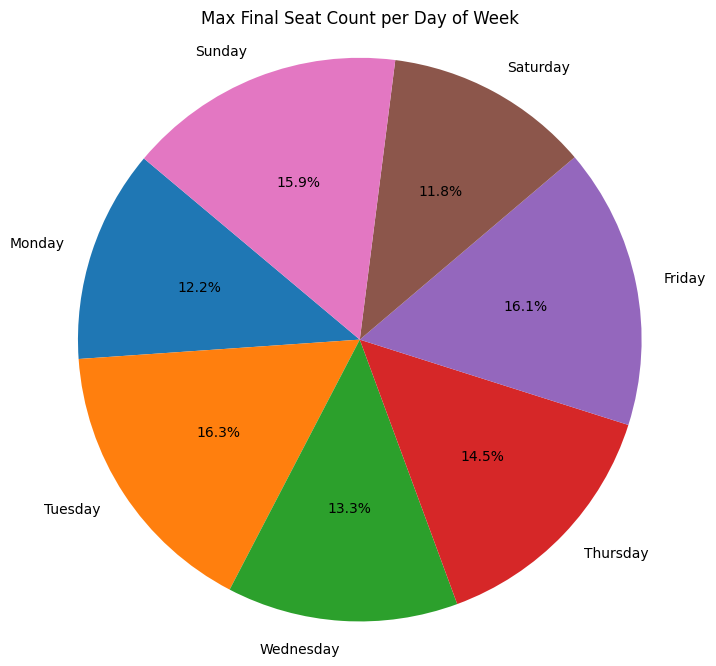

In [23]:
import matplotlib.pyplot as plt

# Group and get max seat counts
max_seat_by_day = train1.groupby('day_of_week')['final_seat_count'].max()

# Sort by day order (optional, for cleaner visuals)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
max_seat_by_day = max_seat_by_day.reindex(day_order)

# Plot as pie chart
plt.figure(figsize=(8, 8))
plt.pie(max_seat_by_day, labels=max_seat_by_day.index, autopct='%1.1f%%', startangle=140)
plt.title('Max Final Seat Count per Day of Week')
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular
plt.show()

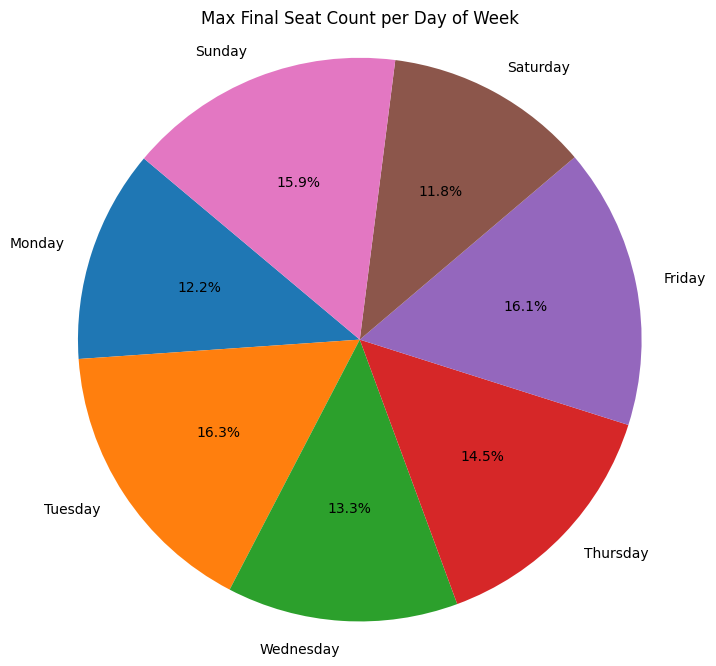

In [24]:
import matplotlib.pyplot as plt

# Group and get max seat counts
median_seat_by_day = train1.groupby('day_of_week')['final_seat_count'].mean()

# Sort by day order (optional, for cleaner visuals)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
meadian_seat_by_day = median_seat_by_day.reindex(day_order)

# Plot as pie chart
plt.figure(figsize=(8, 8))
plt.pie(max_seat_by_day, labels=max_seat_by_day.index, autopct='%1.1f%%', startangle=140)
plt.title('Max Final Seat Count per Day of Week')
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular
plt.show()

In [ ]:
train['routeid'] = train['srcid'].astype(str) + "_" + train['destid'].astype(str)
#filtered_df1['routeid'] = filtered_df1['srcid'].astype(str) + "_" + filtered_df1['destid'].astype(str)

In [ ]:
train[['srcid_tier','destid_tier','final_seat_count']]

In [ ]:
train['routeid'].unique()

In [25]:

train1['tier_combo'] = train1['srcid_tier'].astype(str) + "_" + train1['destid_tier'].astype(str)
tier_seat_map = {
    "1_3": 8.8,
    "1_4": 9.9,
    "2_4": 8.7,
    "3_1": 11.7,
    "3_3": 8.1,
    "3_4": 10.7,
    "4_1": 9.9,
    "4_2": 9.0,
    "4_3": 10.8,
    "4_4": 12.4,
}

train1['tier_combo_encoded'] = train1['tier_combo'].map(tier_seat_map)

/tmp/ipykernel_3856/838040084.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train1['tier_combo'] = train1['srcid_tier'].astype(str) + "_" + train1['destid_tier'].astype(str)
/tmp/ipykernel_3856/838040084.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train1['tier_combo_encoded'] = train1['tier_combo'].map(tier_seat_map)


In [26]:
import holidays
from datetime import timedelta


# Define Indian holidays for the relevant year(s)
indian_holidays = holidays.India(years=train1['year'].unique())

# Get a set of dates 3 days before and after each holiday
holiday_buffer = set()

for holiday in indian_holidays.keys():
    for offset in range(-4, 5):  # -3 to +3 days
        holiday_buffer.add(holiday + timedelta(days=offset))

#train['near_holiday'] = train['doj'].isin(holiday_buffer)


top_seats = sorted(train1['final_seat_count'].unique())[-20:]
print(top_seats)

for i in top_seats:
    print('\n')
    doj=train1[train1['final_seat_count'] == i]['doj'].iloc[0]
    print(doj)
    print(train1[train1['final_seat_count'] == i].loc[:, ['doj', 'day_of_week', 'final_seat_count']].head(1),doj in holiday_buffer )
    print( )

[10134.0, 10326.0, 10452.0, 10467.0, 10674.0, 10716.0, 10788.0, 10854.0, 10868.0, 11008.0, 11025.0, 11319.0, 11529.0, 11680.0, 12024.0, 12219.0, 12684.0, 13200.0, 13364.0, 13503.0]


2023-10-02
               doj day_of_week  final_seat_count
668005  2023-10-02      Monday           10134.0 True



2024-10-13
                doj day_of_week  final_seat_count
1836705  2024-10-13      Sunday           10326.0 True



2024-08-14
                doj day_of_week  final_seat_count
1650704  2024-08-14   Wednesday           10452.0 True



2024-10-20
                doj day_of_week  final_seat_count
1858405  2024-10-20      Sunday           10467.0 False



2024-04-21
                doj day_of_week  final_seat_count
1294205  2024-04-21      Sunday           10674.0 True



2023-08-11
               doj day_of_week  final_seat_count
506804  2023-08-11      Friday           10716.0 True



2024-11-03
                doj day_of_week  final_seat_count
1901816  2024-11-03      Sunday           107

In [27]:
is_highest_hol =[]
for i in train1.index:
    doj=train1.loc[i,'doj']
    dow=train1.loc[i,'day_of_week']
    if doj in holiday_buffer:
        is_highest_hol.append(2)
    elif dow in ['Friday','Saturday','Sunday']:
        is_highest_hol.append(1)
    else:
        is_highest_hol.append(0.1)

        
train1['higer_finalseat_count'] = is_highest_hol
train1.head()  

/tmp/ipykernel_3856/417507759.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train1['higer_finalseat_count'] = is_highest_hol


,doj,doi,srcid,destid,srcid_region,destid_region,srcid_tier,destid_tier,cumsum_seatcount,cumsum_searchcount,dbd,final_seat_count,year,month,day,day_of_week,tier_combo,tier_combo_encoded,higer_finalseat_count
1500,2023-03-01,2023-02-14,45,46,Karnataka,Tamil Nadu,4,4,16.0,480.0,15,2838.0,2023,3,1,Wednesday,4_4,12.4,0.1
1501,2023-03-01,2023-02-14,46,45,Tamil Nadu,Karnataka,4,4,34.0,352.0,15,2298.0,2023,3,1,Wednesday,4_4,12.4,0.1
1502,2023-03-01,2023-02-14,45,47,Karnataka,Andhra Pradesh,4,4,36.0,892.0,15,2720.0,2023,3,1,Wednesday,4_4,12.4,0.1
1503,2023-03-01,2023-02-14,47,45,Andhra Pradesh,Karnataka,4,4,18.0,1130.0,15,2580.0,2023,3,1,Wednesday,4_4,12.4,0.1
1504,2023-03-01,2023-02-14,46,9,Tamil Nadu,Tamil Nadu,4,3,48.0,1023.0,15,4185.0,2023,3,1,Wednesday,4_3,10.8,0.1


In [28]:
train1.drop(['doj','doi','srcid','destid','tier_combo','srcid_region','destid_region','day_of_week'],axis=1,inplace=True)

/tmp/ipykernel_3856/1965462862.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train1.drop(['doj','doi','srcid','destid','tier_combo','srcid_region','destid_region','day_of_week'],axis=1,inplace=True)


In [29]:
train1

,srcid_tier,destid_tier,cumsum_seatcount,cumsum_searchcount,dbd,final_seat_count,year,month,day,tier_combo_encoded,higer_finalseat_count
1500,4,4,16.0,480.0,15,2838.0,2023,3,1,12.4,0.1
1501,4,4,34.0,352.0,15,2298.0,2023,3,1,12.4,0.1
1502,4,4,36.0,892.0,15,2720.0,2023,3,1,12.4,0.1
1503,4,4,18.0,1130.0,15,2580.0,2023,3,1,12.4,0.1
1504,4,3,48.0,1023.0,15,4185.0,2023,3,1,10.8,0.1
...,...,...,...,...,...,...,...,...,...,...,...
2083195,4,3,800.0,34460.0,0,800.0,2024,12,31,10.8,0.1
2083196,3,4,1360.0,25295.0,0,1360.0,2024,12,31,10.7,0.1
2083197,4,2,560.0,26570.0,0,560.0,2024,12,31,9.0,0.1
2083198,4,3,535.0,18065.0,0,535.0,2024,12,31,10.8,0.1


In [30]:
from sklearn.model_selection import train_test_split


y = train1['final_seat_count']
X= train1.drop(['final_seat_count'],axis=1)


X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2,shuffle=True)

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_val_scaled = scaler.transform(X_val)

In [ ]:
X_train_scaled.shape

In [ ]:
from tensorflow.keras import layers, models

# Define encoder
input_dim = X_train.shape[1]  
input_layer = layers.Input(shape=(input_dim,))
x = layers.Dense(128, activation='relu')(input_layer)
x = layers.Dense(64, activation='relu')(x)
z = layers.Dense(32, activation='relu')(x)  # Latent space

# Define decoder (for pretraining)
decoder = layers.Dense(64, activation='relu')(z)
decoder = layers.Dense(128, activation='relu')(decoder)
output_decoder = layers.Dense(1)(decoder)

# Regression head
reg_head = layers.Dense(16, activation='relu')(z)
output_reg = layers.Dense(1)(reg_head)  # Linear activation

# Two-stage training: Autoencoder first
autoencoder = models.Model(input_layer, output_decoder)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_train, X_train, epochs=100, validation_split=0.2)

# Then train regression model
encoder = models.Model(input_layer, z)
encoder.trainable = False  # Freeze encoder
regression_model = models.Sequential([
    encoder,
    layers.Dense(16, activation='relu'),
    layers.Dense(1)
])
regression_model.compile(optimizer='adam', loss='mse')
regression_model.fit(X_train, y_train, epochs=50, validation_split=0.2)

# Evaluate
y_pred = regression_model.predict(X_test)

In [ ]:
y_pred = regression_model.predict(X_val)

In [ ]:
from sklearn.metrics import mean_squared_error
print('RMSE: ', mean_squared_error(y_val, y_pred)**(0.5))

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf = RandomForestRegressor(n_estimators=170, 
                            min_samples_split=10, 
                            min_samples_leaf=4, 
                            max_depth= 30)

rf.fit(X_train_scaled,y_train)

y_pred = rf.predict(X_val_scaled)


print('RMSE: ', mean_squared_error(y_val, y_pred)**(0.5))

In [32]:
!pip install autogluon.tabular

In [ ]:
!uv pip install -q --system scikit-learn==1.5.2

!pip install -U ipywidgets

In [36]:
from autogluon.tabular import TabularPredictor

# Specify the column name you want to predict
# Train the model
predictor = TabularPredictor(label= 'final_seat_count').fit(train_data=train1,presets='best')


No path specified. Models will be saved in: "AutogluonModels/ag-20250622_150524"
Preset alias specified: 'best' maps to 'best_quality'.
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Nov 10 10:07:59 UTC 2024
CPU Count:          4
Memory Avail:       28.46 GB / 31.35 GB (90.8%)
Disk Space Avail:   19.50 GB / 19.52 GB (99.9%)
Presets specified: ['best']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_st

[1000]	valid_set's rmse: 635.867
[2000]	valid_set's rmse: 622.484


	Ran out of time, early stopping on iteration 2336. Best iteration is:
	[2336]	valid_set's rmse: 619.685


[1000]	valid_set's rmse: 635.084
[2000]	valid_set's rmse: 622.514


	Ran out of time, early stopping on iteration 2333. Best iteration is:
	[2333]	valid_set's rmse: 619.484


[1000]	valid_set's rmse: 634.103
[2000]	valid_set's rmse: 621.034


	Ran out of time, early stopping on iteration 2375. Best iteration is:
	[2375]	valid_set's rmse: 617.805


[1000]	valid_set's rmse: 633.172
[2000]	valid_set's rmse: 620.428


	Ran out of time, early stopping on iteration 2404. Best iteration is:
	[2404]	valid_set's rmse: 617.045


[1000]	valid_set's rmse: 638.246
[2000]	valid_set's rmse: 625.711


	Ran out of time, early stopping on iteration 2450. Best iteration is:
	[2450]	valid_set's rmse: 621.949


[1000]	valid_set's rmse: 635.748
[2000]	valid_set's rmse: 622.572


	Ran out of time, early stopping on iteration 2549. Best iteration is:
	[2549]	valid_set's rmse: 618.219


[1000]	valid_set's rmse: 639.862
[2000]	valid_set's rmse: 626.343


	Ran out of time, early stopping on iteration 2621. Best iteration is:
	[2621]	valid_set's rmse: 621.508


[1000]	valid_set's rmse: 636.046
[2000]	valid_set's rmse: 623.13


	Ran out of time, early stopping on iteration 2950. Best iteration is:
	[2950]	valid_set's rmse: 616.192
	-618.9887	 = Validation score   (-root_mean_squared_error)
	506.76s	 = Training   runtime
	70.59s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 7.52s of the 306.88s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 2. Best iteration is:
	[2]	valid_set's rmse: 1135.59
	Time limit exceeded... Skipping LightGBM_BAG_L1.
Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 6.33s of the 305.68s of remaining time.
	Time limit exceeded... Skipping RandomForestMSE_BAG_L1.
Fitting model: CatBoost_BAG_L1 ... Training model for up to 0.07s of the 299.43s of remaining time.
	Time limit exceeded... Skipping CatBoost_BAG_L1.
Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.00s of the 299.13s of remaining time.
	Ensemble Weights

[1000]	valid_set's rmse: 609.705
[1000]	valid_set's rmse: 612.066


	Ran out of time, early stopping on iteration 1024. Best iteration is:
	[1024]	valid_set's rmse: 611.896


[1000]	valid_set's rmse: 613.501


	Ran out of time, early stopping on iteration 1060. Best iteration is:
	[1060]	valid_set's rmse: 612.917


[1000]	valid_set's rmse: 611.318


	Ran out of time, early stopping on iteration 1083. Best iteration is:
	[1083]	valid_set's rmse: 610.627


[1000]	valid_set's rmse: 611.011


	Ran out of time, early stopping on iteration 1142. Best iteration is:
	[1142]	valid_set's rmse: 609.709


[1000]	valid_set's rmse: 611.03


	Ran out of time, early stopping on iteration 1223. Best iteration is:
	[1223]	valid_set's rmse: 608.948


[1000]	valid_set's rmse: 608.456


	Ran out of time, early stopping on iteration 1345. Best iteration is:
	[1345]	valid_set's rmse: 605.742
	-609.9296	 = Validation score   (-root_mean_squared_error)
	263.48s	 = Training   runtime
	28.88s	 = Validation runtime
Fitting model: WeightedEnsemble_L3 ... Training model for up to 360.00s of the 5.05s of remaining time.
	Ensemble Weights: {'LightGBMXT_BAG_L2': 1.0}
	-609.9296	 = Validation score   (-root_mean_squared_error)
	0.46s	 = Training   runtime
	0.01s	 = Validation runtime
AutoGluon training complete, total runtime = 894.62s ... Best model: WeightedEnsemble_L3 | Estimated inference throughput: 1188.8 rows/s (119467 batch size)
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/kaggle/working/AutogluonModels/ag-20250622_150524/ds_sub_fit/sub_fit_ho")
Deleting DyStack predictor artifacts (clean_up_fits=True) ...
Leaderboard on holdout data (DyStack):
                   model  score_holdout    score_val              eval_metric  pred_time_test  pred_

[1000]	valid_set's rmse: 633.091
[2000]	valid_set's rmse: 619.399
[3000]	valid_set's rmse: 612.263
[4000]	valid_set's rmse: 607.169
[5000]	valid_set's rmse: 602.937
[6000]	valid_set's rmse: 599.734
[7000]	valid_set's rmse: 596.738


	Ran out of time, early stopping on iteration 7921. Best iteration is:
	[7921]	valid_set's rmse: 594.537


[1000]	valid_set's rmse: 637.362
[2000]	valid_set's rmse: 623.433
[3000]	valid_set's rmse: 615.963
[4000]	valid_set's rmse: 610.669
[5000]	valid_set's rmse: 606.667
[6000]	valid_set's rmse: 603.112
[7000]	valid_set's rmse: 600.245
[8000]	valid_set's rmse: 597.71


	Ran out of time, early stopping on iteration 8113. Best iteration is:
	[8113]	valid_set's rmse: 597.451


[1000]	valid_set's rmse: 631.323
[2000]	valid_set's rmse: 617.625
[3000]	valid_set's rmse: 609.733
[4000]	valid_set's rmse: 604.531
[5000]	valid_set's rmse: 600.585
[6000]	valid_set's rmse: 597.467
[7000]	valid_set's rmse: 594.744
[8000]	valid_set's rmse: 592.539


	Ran out of time, early stopping on iteration 8111. Best iteration is:
	[8111]	valid_set's rmse: 592.289


[1000]	valid_set's rmse: 637.93
[2000]	valid_set's rmse: 624.306
[3000]	valid_set's rmse: 617.09
[4000]	valid_set's rmse: 611.879
[5000]	valid_set's rmse: 607.945
[6000]	valid_set's rmse: 604.879
[7000]	valid_set's rmse: 602.064
[8000]	valid_set's rmse: 599.723


	Ran out of time, early stopping on iteration 8220. Best iteration is:
	[8220]	valid_set's rmse: 599.18


[1000]	valid_set's rmse: 635.963
[2000]	valid_set's rmse: 622.737
[3000]	valid_set's rmse: 615.133
[4000]	valid_set's rmse: 610.013
[5000]	valid_set's rmse: 605.762
[6000]	valid_set's rmse: 602.341
[7000]	valid_set's rmse: 599.482
[8000]	valid_set's rmse: 597.169


	Ran out of time, early stopping on iteration 8294. Best iteration is:
	[8294]	valid_set's rmse: 596.5


[1000]	valid_set's rmse: 637.729
[2000]	valid_set's rmse: 623.995
[3000]	valid_set's rmse: 616.366
[4000]	valid_set's rmse: 610.853
[5000]	valid_set's rmse: 606.873
[6000]	valid_set's rmse: 603.523
[7000]	valid_set's rmse: 600.736
[8000]	valid_set's rmse: 598.42


	Ran out of time, early stopping on iteration 8513. Best iteration is:
	[8513]	valid_set's rmse: 597.259


[1000]	valid_set's rmse: 636.894
[2000]	valid_set's rmse: 623.522
[3000]	valid_set's rmse: 615.922
[4000]	valid_set's rmse: 610.288
[5000]	valid_set's rmse: 606.174
[6000]	valid_set's rmse: 603.02
[7000]	valid_set's rmse: 600.25
[8000]	valid_set's rmse: 597.927


	Ran out of time, early stopping on iteration 8761. Best iteration is:
	[8761]	valid_set's rmse: 596.247


[1000]	valid_set's rmse: 638.871
[2000]	valid_set's rmse: 625.77
[3000]	valid_set's rmse: 618.203
[4000]	valid_set's rmse: 612.88
[5000]	valid_set's rmse: 608.936
[6000]	valid_set's rmse: 605.662
[7000]	valid_set's rmse: 602.785
[8000]	valid_set's rmse: 600.27
[9000]	valid_set's rmse: 598.111


	Ran out of time, early stopping on iteration 9433. Best iteration is:
	[9433]	valid_set's rmse: 597.26
	-596.3436	 = Validation score   (-root_mean_squared_error)
	1453.45s	 = Training   runtime
	245.14s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 13.28s of the 878.89s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 21. Best iteration is:
	[21]	valid_set's rmse: 820.307
	Ran out of time, early stopping on iteration 23. Best iteration is:
	[23]	valid_set's rmse: 808.976
	Ran out of time, early stopping on iteration 24. Best iteration is:
	[24]	valid_set's rmse: 797.221
	Ran out of time, early stopping on iteration 24. Best iteration is:
	[24]	valid_set's rmse: 801.382
	Ran out of time, early stopping on iteration 26. Best iteration is:
	[26]	valid_set's rmse: 786.481
	Ran out of time, early stopping on iteration 27. Best iteration is:
	[27]	vali

[1000]	valid_set's rmse: 590.894
[2000]	valid_set's rmse: 585.905
[3000]	valid_set's rmse: 582.8


	Ran out of time, early stopping on iteration 3045. Best iteration is:
	[3045]	valid_set's rmse: 582.696


[1000]	valid_set's rmse: 591.913
[2000]	valid_set's rmse: 587.089
[3000]	valid_set's rmse: 584.199


	Ran out of time, early stopping on iteration 3263. Best iteration is:
	[3263]	valid_set's rmse: 583.516


[1000]	valid_set's rmse: 596.728
[2000]	valid_set's rmse: 591.608
[3000]	valid_set's rmse: 588.289


	Ran out of time, early stopping on iteration 3344. Best iteration is:
	[3344]	valid_set's rmse: 587.347


[1000]	valid_set's rmse: 590.897
[2000]	valid_set's rmse: 586.04
[3000]	valid_set's rmse: 583.112


	Ran out of time, early stopping on iteration 3419. Best iteration is:
	[3419]	valid_set's rmse: 582.143


[1000]	valid_set's rmse: 592.715
[2000]	valid_set's rmse: 587.73
[3000]	valid_set's rmse: 584.689


	Ran out of time, early stopping on iteration 3481. Best iteration is:
	[3481]	valid_set's rmse: 583.632


[1000]	valid_set's rmse: 594.483
[2000]	valid_set's rmse: 589.127
[3000]	valid_set's rmse: 586.115


	Ran out of time, early stopping on iteration 3591. Best iteration is:
	[3591]	valid_set's rmse: 584.704


[1000]	valid_set's rmse: 593.708
[2000]	valid_set's rmse: 588.941
[3000]	valid_set's rmse: 586.08


	Ran out of time, early stopping on iteration 3804. Best iteration is:
	[3804]	valid_set's rmse: 584.377


[1000]	valid_set's rmse: 589.505
[2000]	valid_set's rmse: 584.607
[3000]	valid_set's rmse: 581.595
[4000]	valid_set's rmse: 579.418


	Ran out of time, early stopping on iteration 4081. Best iteration is:
	[4081]	valid_set's rmse: 579.255
	-583.4628	 = Validation score   (-root_mean_squared_error)
	745.12s	 = Training   runtime
	100.83s	 = Validation runtime
Fitting model: LightGBM_BAG_L2 ... Training model for up to 10.97s of the 10.91s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 2. Best iteration is:
	[2]	valid_set's rmse: 1109.71
	Time limit exceeded... Skipping LightGBM_BAG_L2.
Fitting model: WeightedEnsemble_L3 ... Training model for up to 360.00s of the 9.07s of remaining time.
	Ensemble Weights: {'LightGBMXT_BAG_L2': 1.0}
	-583.4628	 = Validation score   (-root_mean_squared_error)
	0.7s	 = Training   runtime
	0.02s	 = Validation runtime
AutoGluon training complete, total runtime = 2588.95s ... Best model: WeightedEnsemble_L3 | Estimated inference throughput: 386.6 rows/s (134400 batch size)
TabularPredi

In [144]:
test = df1[df1['doj']> date(2024,12,31)]

In [145]:
test['doj'] = pd.to_datetime(test['doj'])
test['doj'] = test['doj'].dt.strftime('%Y-%m-%d') 

/tmp/ipykernel_3856/482333129.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['doj'] = pd.to_datetime(test['doj'])
/tmp/ipykernel_3856/482333129.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['doj'] = test['doj'].dt.strftime('%Y-%m-%d')


In [146]:
test_sorted = test.set_index(['doj', 'srcid', 'destid']).loc[
    df_test.set_index(['doj', 'srcid', 'destid']).index
].reset_index()

test_sorted.shape

(182900, 11)

In [147]:
test_sorted = test_sorted[test_sorted.dbd<=15]

In [148]:
test_sorted

,doj,srcid,destid,doi,srcid_region,destid_region,srcid_tier,destid_tier,cumsum_seatcount,cumsum_searchcount,dbd
15,2025-02-11,46,45,2025-01-27,Tamil Nadu,Karnataka,Tier 1,Tier 1,38.0,1082.0,15
16,2025-02-11,46,45,2025-01-28,Tamil Nadu,Karnataka,Tier 1,Tier 1,0.0,0.0,14
17,2025-02-11,46,45,2025-01-29,Tamil Nadu,Karnataka,Tier 1,Tier 1,0.0,0.0,13
18,2025-02-11,46,45,2025-01-30,Tamil Nadu,Karnataka,Tier 1,Tier 1,0.0,0.0,12
19,2025-02-11,46,45,2025-01-31,Tamil Nadu,Karnataka,Tier 1,Tier 1,0.0,0.0,11
...,...,...,...,...,...,...,...,...,...,...,...
182895,2025-01-27,32,19,2025-01-23,Madhya Pradesh,Madhya Pradesh,Tier 1,Tier 1,0.0,0.0,4
182896,2025-01-27,32,19,2025-01-24,Madhya Pradesh,Madhya Pradesh,Tier 1,Tier 1,0.0,0.0,3
182897,2025-01-27,32,19,2025-01-25,Madhya Pradesh,Madhya Pradesh,Tier 1,Tier 1,0.0,0.0,2
182898,2025-01-27,32,19,2025-01-26,Madhya Pradesh,Madhya Pradesh,Tier 1,Tier 1,0.0,0.0,1


In [149]:
test_sorted['doj'] = pd.to_datetime(test_sorted['doj'],errors='coerce',dayfirst=False)

In [150]:
test_sorted['year'] = test_sorted['doj'].apply(lambda x: x.year)
test_sorted['month'] = test_sorted['doj'].apply(lambda x: x.month)
test_sorted['day'] = test_sorted['doj'].apply(lambda x: x.day)
test_sorted['day_of_week'] = test_sorted['doj'].apply(lambda x: x.strftime('%A'))  # e.g., 'Monday'

In [ ]:
import holidays
from datetime import timedelta


# Define Indian holidays for the relevant year(s)
indian_holidays_2025 = holidays.India(years=test_sorted['year'].unique())

# Get a set of dates 3 days before and after each holiday
holiday_buffer = set()

for holiday in indian_holidays_2025.keys():
    for offset in range(-4, 5):  # -3 to +3 days
        holiday_buffer.add(holiday + timedelta(days=offset))

#train['near_holiday'] = train['doj'].isin(holiday_buffer)


In [152]:
test_sorted['day_of_week'] = test_sorted['doj'].apply(lambda x: x.strftime('%A'))  # e.g., 'Monday'

is_highest_hol =[]
for i in test_sorted.index:
    doj=test_sorted.loc[i,'doj']
    dow=test_sorted.loc[i,'day_of_week']
    if doj in holiday_buffer:
        is_highest_hol.append(2)
    elif dow in ['Friday','Saturday','Sunday']:
        is_highest_hol.append(1)
    else:
        is_highest_hol.append(0.1)

        
test_sorted['higher_finalseat_count'] = is_highest_hol
test_sorted.head() 

,doj,srcid,destid,doi,srcid_region,destid_region,srcid_tier,destid_tier,cumsum_seatcount,cumsum_searchcount,dbd,year,month,day,day_of_week,tier_combo,tier_combo_encoded,higer_finalseat_count
15,2025-02-11,46,45,2025-01-27,Tamil Nadu,Karnataka,4,4,38.0,1082.0,15,2025,2,11,Tuesday,4_4,12.4,0.1
16,2025-02-11,46,45,2025-01-28,Tamil Nadu,Karnataka,4,4,0.0,0.0,14,2025,2,11,Tuesday,4_4,12.4,0.1
17,2025-02-11,46,45,2025-01-29,Tamil Nadu,Karnataka,4,4,0.0,0.0,13,2025,2,11,Tuesday,4_4,12.4,0.1
18,2025-02-11,46,45,2025-01-30,Tamil Nadu,Karnataka,4,4,0.0,0.0,12,2025,2,11,Tuesday,4_4,12.4,0.1
19,2025-02-11,46,45,2025-01-31,Tamil Nadu,Karnataka,4,4,0.0,0.0,11,2025,2,11,Tuesday,4_4,12.4,0.1


In [151]:
test_sorted['srcid_tier']=test_sorted['srcid_tier'].map({'Tier 1':4,'Tier2':3,'Tier 3':2,'Tier 4':1})
test_sorted['destid_tier']=test_sorted['destid_tier'].map({'Tier 1':4,'Tier2':3,'Tier 3':2,'Tier 4':1})
test_sorted['tier_combo'] = test_sorted['srcid_tier'].astype(str) + "_" + test_sorted['destid_tier'].astype(str)
test_sorted['tier_combo_encoded'] = test_sorted['tier_combo'].map(tier_seat_map)

In [153]:
test_sorted.drop(['doi','doj','srcid_region','destid_region','day_of_week','srcid','destid','tier_combo'],axis=1,inplace=True)

In [154]:
test_sorted

,srcid_tier,destid_tier,cumsum_seatcount,cumsum_searchcount,dbd,year,month,day,tier_combo_encoded,higer_finalseat_count
15,4,4,38.0,1082.0,15,2025,2,11,12.4,0.1
16,4,4,0.0,0.0,14,2025,2,11,12.4,0.1
17,4,4,0.0,0.0,13,2025,2,11,12.4,0.1
18,4,4,0.0,0.0,12,2025,2,11,12.4,0.1
19,4,4,0.0,0.0,11,2025,2,11,12.4,0.1
...,...,...,...,...,...,...,...,...,...,...
182895,4,4,0.0,0.0,4,2025,1,27,12.4,0.1
182896,4,4,0.0,0.0,3,2025,1,27,12.4,0.1
182897,4,4,0.0,0.0,2,2025,1,27,12.4,0.1
182898,4,4,0.0,0.0,1,2025,1,27,12.4,0.1


In [70]:
test_sorted.dbd.min()

0

In [105]:
train1

,srcid_tier,destid_tier,cumsum_seatcount,cumsum_searchcount,dbd,final_seat_count,year,month,day,tier_combo_encoded,higer_finalseat_count
1500,4,4,16.0,480.0,15,2838.0,2023,3,1,12.4,0.1
1501,4,4,34.0,352.0,15,2298.0,2023,3,1,12.4,0.1
1502,4,4,36.0,892.0,15,2720.0,2023,3,1,12.4,0.1
1503,4,4,18.0,1130.0,15,2580.0,2023,3,1,12.4,0.1
1504,4,3,48.0,1023.0,15,4185.0,2023,3,1,10.8,0.1
...,...,...,...,...,...,...,...,...,...,...,...
2083195,4,3,800.0,34460.0,0,800.0,2024,12,31,10.8,0.1
2083196,3,4,1360.0,25295.0,0,1360.0,2024,12,31,10.7,0.1
2083197,4,2,560.0,26570.0,0,560.0,2024,12,31,9.0,0.1
2083198,4,3,535.0,18065.0,0,535.0,2024,12,31,10.8,0.1


In [155]:
X_test = scaler.transform(test_sorted)

In [156]:
test_sorted['final_seatcount'] = predictor.predict(test_sorted) 

In [119]:
test_sorted

,srcid_tier,destid_tier,cumsum_seatcount,cumsum_searchcount,dbd,year,month,day,tier_combo_encoded,higer_finalseat_count,final_seatcount
15,4,4,38.0,1082.0,15,2025,2,11,12.4,0.1,2774.127686
46,3,4,0.0,1175.0,15,2025,1,20,10.7,0.1,1478.831787
77,4,3,0.0,370.0,15,2025,1,8,10.8,0.1,1119.539429
108,3,4,0.0,120.0,15,2025,1,8,10.7,0.1,1127.867065
139,3,4,39.0,1230.0,15,2025,1,8,10.7,0.1,3115.485107
...,...,...,...,...,...,...,...,...,...,...,...
182760,4,3,126.0,4578.0,15,2025,1,23,10.8,0.1,3469.206055
182791,4,3,249.0,11337.0,15,2025,2,21,10.8,1.0,7202.269043
182822,4,4,4.0,408.0,15,2025,1,17,12.4,1.0,1690.735718
182853,4,3,4.0,1132.0,15,2025,1,24,10.8,1.0,1422.295532


In [157]:
submit1=pd.DataFrame()

In [158]:
submit1['route_key'] = df_test['route_key']

In [160]:
submit1

,route_key,final_seatcount
0,2025-02-11_46_45,2774.127686
1,2025-01-20_17_23,1478.831787
2,2025-01-08_02_14,1119.539429
3,2025-01-08_08_47,1127.867065
4,2025-01-08_09_46,3115.485107
...,...,...
5895,2025-01-23_46_48,3469.206055
5896,2025-02-21_46_09,7202.269043
5897,2025-01-17_32_19,1690.735718
5898,2025-01-24_45_03,1422.295532


In [159]:
submit1['final_seatcount'] = test_sorted.loc[test_sorted.dbd==test_sorted.dbd.max(),'final_seatcount'].values

In [123]:
df_test

,route_key,doj,srcid,destid
0,2025-02-11_46_45,2025-02-11,46,45
1,2025-01-20_17_23,2025-01-20,17,23
2,2025-01-08_02_14,2025-01-08,2,14
3,2025-01-08_08_47,2025-01-08,8,47
4,2025-01-08_09_46,2025-01-08,9,46
...,...,...,...,...
5895,2025-01-23_46_48,2025-01-23,46,48
5896,2025-02-21_46_09,2025-02-21,46,9
5897,2025-01-17_32_19,2025-01-17,32,19
5898,2025-01-24_45_03,2025-01-24,45,3


In [161]:
submit1.to_csv('submission.csv',index=False)